In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, QuantumCircuit
from qiskit.providers.ibmq import RunnerResult
from qiskit.tools.monitor import job_monitor
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
provider = IBMQ.get_provider(hub='ibm-q-pnnl', group='internal', project='default')
mybackend = provider.get_backend('ibmq_mumbai')
smallbackend = provider.get_backend('ibmq_santiago')
print(provider)
print(mybackend)
provider = IBMQ.get_provider(hub='ibm-q-pnnl', group='internal', project='default')
provider.backends()

<AccountProvider for IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>
ibmq_mumbai


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>,
 <IBMQBackend('ibmq_montreal') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>,
 <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>,
 <IBMQBackend('ibmq_mumbai') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>,
 <IBMQBackend('ibmq_guadalupe

In [3]:
rt = provider.runtime
provider.runtime.pprint_programs()

hello-world:
  Name: hello-world
  Description: A sample runtime program.
qaoa:
  Name: qaoa
  Description: Qiskit Runtime QAOA program
torch-train:
  Name: torch-train
  Description: A runtime program to train hybrid QNN models with Pytorch.
torch-infer:
  Name: torch-infer
  Description: A runtime program to run inference and calculate the scores of Hybrid QNN models with Pytorch.
qasm3-runner:
  Name: qasm3-runner
  Description: A runtime program that takes one or more circuits, converts them to OpenQASM3, compiles them, executes them, and optionally applies measurement error mitigation. This program can also take and execute one or more OpenQASM3 strings. Note that this program can only run on a backend that supports OpenQASM3.
sampler:
  Name: sampler
  Description: Generates quasi-probabilities by sampling quantum circuits.
estimator:
  Name: estimator
  Description: Calculates expectation values of quantum operators.
sample-expval:
  Name: sample-expval
  Description: A sample e

5


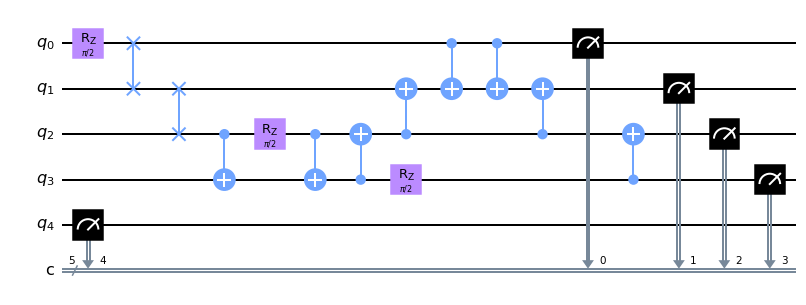

In [4]:
qc = QuantumCircuit.from_qasm_file('schedule2.qasm')
mrange = [i for i in range(5) ]
qc.measure(mrange, mrange)
print(len(qc.qubits))
qc.draw(output='mpl')
# from qiskit import QuantumCircuit, Aer, execute
# simbackend = provider.get_backend('ibmq_qasm_simulator')
# job = execute(qc, simbackend)
# result = job.result()
# print(result.get_counts())

In [5]:
qc_base = QuantumCircuit.from_qasm_file('schedule_baseline.qasm')
qc_base.measure_all()
# qc.draw(output='mpl')
from qiskit import QuantumCircuit, Aer, execute
simbackend = provider.get_backend('ibmq_qasm_simulator')
job = execute(qc_base, simbackend)
result = job.result()
print(result.get_counts())

{'00000000 00000000': 4000}


In [6]:
cplist = [i for i in range(27)]
print(cplist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [51]:
# from qiskit.tools.monitor import job_monitor
# shots = 20000
# params = provider.runtime.program(program_id="circuit-runner").parameters()
# program_inputs = {
#     'circuits': qc,
#     'shots': shots,
#     'optimization_level': 0,
#     #'iterations': 5,
#     # 'initial_layout': [0,1,2,3,4,5,6],
#     'measurement_error_mitigation': True,
# }
# # params.circuits = circuit
# # params.measurement_error_mitigation = True
# # program_inputs = {
# #     'iterations': 3
# # }
# # Configure backend options
# options = {'backend_name': mybackend.name()}

# # Execute the circuit using the "circuit-runner" program.
# job = provider.runtime.run(program_id="circuit-runner",
#                         options=options,
#                         inputs=program_inputs)

# # Get runtime job result.
# # job_monitor(job)
# result = job.result(decoder=RunnerResult)

# counts = result.get_counts()
# print(counts)


In [47]:
from qiskit.tools.monitor import job_monitor
shots = 20000
params = provider.runtime.program(program_id="circuit-runner").parameters()
program_inputs = {
    'circuits': qc_base,
    'shots': shots,
    'optimization_level': 0,
    #'iterations': 5,
    # 'initial_layout': [0,1,2,3,4,5,6],
    'measurement_error_mitigation': True,
}
# params.circuits = circuit
# params.measurement_error_mitigation = True
# program_inputs = {
#     'iterations': 3
# }
# Configure backend options
options = {'backend_name': smallbackend.name()}

# Execute the circuit using the "circuit-runner" program.
job = provider.runtime.run(program_id="circuit-runner",
                        options=options,
                        inputs=program_inputs)

# Get runtime job result.
# job_monitor(job)
result = job.result(decoder=RunnerResult)

counts = result.get_counts()
print(counts)


{'00000': 5901, '00001': 1239, '10000': 348, '10001': 73, '10010': 210, '10011': 54, '10100': 105, '10101': 50, '10110': 88, '10111': 64, '11000': 42, '11001': 12, '11010': 33, '11011': 14, '11100': 41, '11101': 24, '11110': 58, '11111': 31, '00010': 3670, '00011': 922, '00100': 1361, '00101': 511, '00110': 1321, '00111': 742, '01000': 579, '01001': 163, '01010': 336, '01011': 170, '01100': 627, '01101': 203, '01110': 724, '01111': 284}


In [49]:
print(counts['000000000000000000000000000']/shots)

0.3095


In [7]:
def crosstest( list ):
    q = QuantumRegister(7, 'q')
    c = ClassicalRegister(7, 'c')
    circuit2 = QuantumCircuit(q, c)
    circuit2.x(q[list[0]])
    circuit2.x(q[list[2]])
    circuit2.cx(q[list[0]], q[list[1]])
    #circuit2.barrier()
    circuit2.cx(q[list[2]], q[list[1]])
    circuit2.cx(q[list[2]], [list[3]])
    circuit2.measure(q[list[0]],c[list[0]])
    circuit2.measure(q[list[1]],c[list[1]])
    circuit2.measure(q[list[2]],c[list[2]])
    circuit2.measure(q[list[3]],c[list[3]])
    #circuit2.draw(output = 'mpl')
    string = "0000000"
    shots = 20000
    for i in list:
        string = string[:i] + '1' + string[i + 1:]
    string = string[:list[1]] + '0' + string[list[1] + 1:]
    string = string[::-1]
    print(string)
    
    params = provider.runtime.program(program_id="circuit-runner").parameters()
    program_inputs = {
        'circuits': circuit2,
        'shots': shots,
        'optimization_level': 0,
        #'iterations': 5,
        'initial_layout': [0,1,2,3,4,5,6],
        'measurement_error_mitigation': True,
    }
# params.circuits = circuit
# params.measurement_error_mitigation = True
# program_inputs = {
#     'iterations': 3
# }
# Configure backend options
    options = {'backend_name': mybackend.name()}

# Execute the circuit using the "circuit-runner" program.
    job = provider.runtime.run(program_id="circuit-runner",
                               options=options,
                               inputs=program_inputs)

# Get runtime job result.
    result = job.result(decoder=RunnerResult)
    
    counts = result.get_counts()
    print(counts)
    error_rate = 1 - counts[string] / shots
    return error_rate

In [9]:
import qiskit
qiskit.__version__

'0.19.0'

In [ ]:
list = [1,3,5,6]
res = runtimetest(list)
print(res)

1101010


In [ ]:
crossres = crosstest(list)
print(crossres)

In [ ]:
from numpy import mean
list = [1,3,4,5]
nocross = []
cross = []
for x in range(10):
    cur = runtimetest(list)
    cur2 = barriertest(list)
    nocross.append(cur)
    cross.append(cur2)
    print(f"no cross error rate {cur}")
    print(f"cross error rate {cur2}")

print(f"no cross average error rate {mean(nocross)}")
print(f" cross average error rate {mean(cross)}")


In [8]:
def runtime_test(circuit,backend):
    shots = 20000
    qc = QuantumCircuit.from_qasm_file(circuit)
    qnum = len(qc.qubits)
    mrange = [i for i in range(qnum) ]
    qc.measure(mrange, mrange)
    
    mybackend = provider.get_backend(backend)
    params = provider.runtime.program(program_id="circuit-runner").parameters()
    program_inputs = {
        'circuits': qc,
        'shots': shots,
        'optimization_level': 2,
        #'iterations': 5,
        'initial_layout': mrange,
        'measurement_error_mitigation': True,
    }
    # params.circuits = circuit
    # params.measurement_error_mitigation = True
    # program_inputs = {
    #     'iterations': 3
    # }
    # Configure backend options
    options = {'backend_name': mybackend.name()}

    # Execute the circuit using the "circuit-runner" program.
    job = provider.runtime.run(program_id="circuit-runner",
                            options=options,
                            inputs=program_inputs)

    # Get runtime job result.
    # job_monitor(job)
    result = job.result(decoder=RunnerResult)

    counts = result.get_counts()
    print(counts)
    return counts

In [76]:
# qc_base = QuantumCircuit.from_qasm_file('schedule_baseline.qasm')

# runtime_test('schedule_linear.qasm','ibmq_santiago')
# ct = runtime_test('schedule3.qasm','ibmq_montreal')

In [10]:
ct1 = runtime_test('schedule3.qasm','ibmq_toronto')
# ct2 = runtime_test('schedule_linear.qasm','ibmq_guadalupe')
# ct3 = runtime_test('schedule_baseline.qasm','ibmq_guadalupe')

{'00000000': 1964, '00000001': 550, '00010000': 430, '00010001': 159, '00010010': 189, '00010011': 64, '00010100': 237, '00010101': 91, '00010110': 126, '00010111': 45, '00011000': 202, '00011001': 67, '00011010': 107, '00011011': 45, '00011100': 139, '00011101': 63, '00011110': 86, '00011111': 36, '00000010': 738, '00100000': 566, '00100001': 196, '00100010': 244, '00100011': 101, '00100100': 378, '00100101': 156, '00100110': 195, '00100111': 99, '00101000': 276, '00101001': 113, '00101010': 135, '00101011': 79, '00101100': 184, '00101101': 97, '00101110': 140, '00101111': 59, '00000011': 255, '00110000': 138, '00110001': 48, '00110010': 75, '00110011': 23, '00110100': 107, '00110101': 53, '00110110': 59, '00110111': 24, '00111000': 79, '00111001': 39, '00111010': 41, '00111011': 21, '00111100': 60, '00111101': 29, '00111110': 35, '00111111': 30, '00000100': 1093, '01000000': 518, '01000001': 176, '01000010': 192, '01000011': 66, '01000100': 302, '01000101': 127, '01000110': 154, '010

In [134]:
print(ct1['00000000']/shots)
print(ct2['00000000']/shots)
print(ct3['00000000']/shots)

0.137
0.0409
0.0721
